In [2]:
import pandas as pd
import platform
import os

In [73]:
def decode_blackbox(log_path: str):
    """
    Decode the blackbox data from the path
    """
    operating_system = platform.system()
    if operating_system == 'Windows':
        os.system("../libs/blackbox-tools-6.0.0_win64/blackbox_decode.exe " + log_path + " --limits")
    elif operating_system == 'Darwin': # Mac
        os.system("../libs/blackbox-tools-6.0.0_macos/blackbox_decode " + log_path + " --limits")
    else:
        raise Exception('Unknown operating system. Please use Windows or Mac.')
    return pd.read_csv(log_path[:-4] + '.01.csv')

In [74]:
df = decode_blackbox("../data/blackbox/LOG00013.TXT")

Decoding log '../data/blackbox/LOG00013.TXT' to '../data/blackbox/LOG00013.01.csv'...

Log 1 of 1, start 42:31.495, end 42:37.136, duration 00:05.641

Statistics
Looptime           1001 avg            3.0 std dev (0.3%)
I frames     176  101.1 bytes avg    17795 bytes total
P frames    5398   68.3 bytes avg   368717 bytes total
E frames       2    8.0 bytes avg       16 bytes total
S frames     308   44.1 bytes avg    13588 bytes total
Frames      5574   69.3 bytes avg   386512 bytes total
Data rate  988Hz  72273 bytes/s     722800 baud

4 frames failed to decode, rendering 58 loop iterations unreadable. 58 iterations are missing in total (58ms, 1.03%)


    Field name          Min          Max        Range
-----------------------------------------------------
 loopIteration        10336        15967         5631
          time   2551495042   2557136853      5641811
   axisRate[0]            0            0            0
   axisRate[1]            0            0            0
   axisRate[2

In [26]:
df.head()

,loopIteration,time (us),axisRate[0],axisRate[1],axisRate[2],axisP[0],axisP[1],axisP[2],axisI[0],axisI[1],...,sens0Temp,sens1Temp,sens2Temp,sens3Temp,sens4Temp,sens5Temp,sens6Temp,sens7Temp,escRPM,escTemperature
0,10336,2551495042,0,0,0,0,0,0,-3,1,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,-1250,413243,90
1,10368,2551527099,0,0,0,0,0,0,-3,1,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,-1250,413243,90
2,10369,2551528102,0,0,0,0,0,0,-3,1,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,-1250,413243,90
3,10370,2551529108,0,0,0,0,0,0,-3,1,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,-1250,413243,90
4,10371,2551530111,0,0,0,0,0,0,-3,1,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,-1250,413243,90


In [35]:
for col in df.columns:
    print(col)

loopIteration
time (us)
axisRate[0]
axisRate[1]
axisRate[2]
axisP[0]
axisP[1]
axisP[2]
axisI[0]
axisI[1]
axisI[2]
axisD[0]
axisD[1]
axisF[0]
axisF[1]
axisF[2]
fwAltP
fwAltI
fwAltD
fwAltOut
fwPosP
fwPosI
fwPosD
fwPosOut
rcData[0]
rcData[1]
rcData[2]
rcData[3]
rcCommand[0]
rcCommand[1]
rcCommand[2]
rcCommand[3]
vbat (V)
amperage (A)
BaroAlt (cm)
rssi
gyroADC[0]
gyroADC[1]
gyroADC[2]
accSmooth[0]
accSmooth[1]
accSmooth[2]
attitude[0]
attitude[1]
attitude[2]
motor[0]
servo[0]
servo[1]
servo[2]
servo[3]
servo[4]
servo[5]
servo[6]
servo[7]
servo[8]
servo[9]
servo[10]
servo[11]
servo[12]
servo[13]
servo[14]
servo[15]
navState
navFlags
navEPH
navEPV
navPos[0]
navPos[1]
navPos[2]
navVel[0]
navVel[1]
navVel[2]
navTgtVel[0]
navTgtVel[1]
navTgtVel[2]
navTgtPos[0]
navTgtPos[1]
navTgtPos[2]
navSurf
energyCumulative (mAh)
flightModeFlags (flags)
stateFlags (flags)
failsafePhase (flags)
rxSignalReceived
rxFlightChannelsValid
hwHealthStatus
powerSupplyImpedance
sagCompensatedVBat
wind[0]
wind[1]
wind[2

<Axes: >

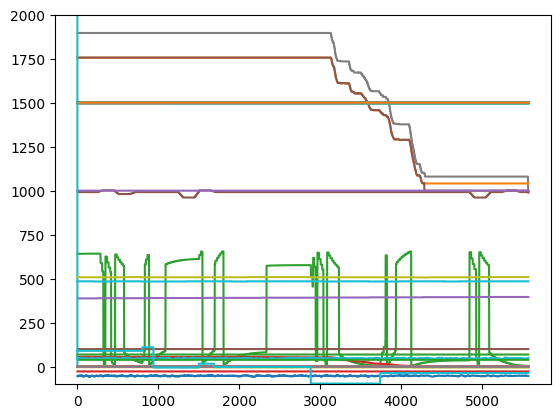

In [76]:
df.plot(legend=False, ylim=[-100, 2000])

<Axes: >

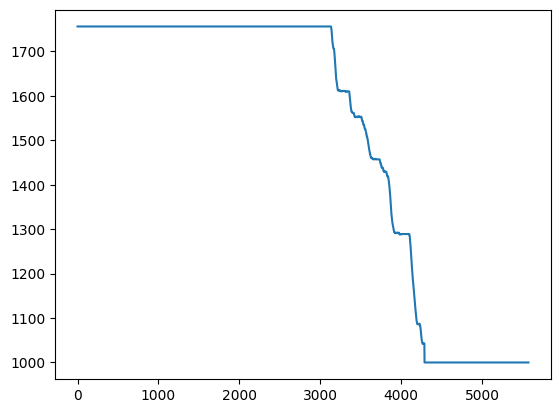

In [82]:
df["motor[0]"].plot()

<Axes: >

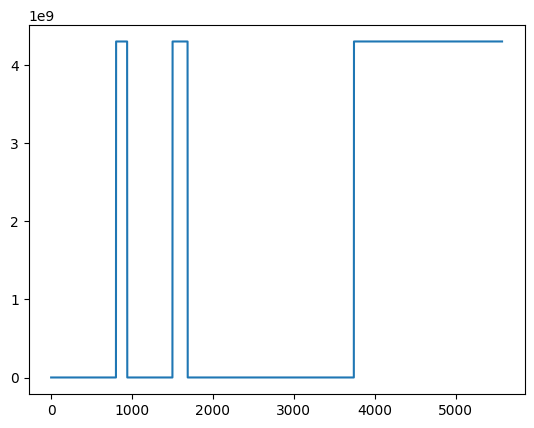

In [81]:
df["escRPM"].plot()

<Axes: >

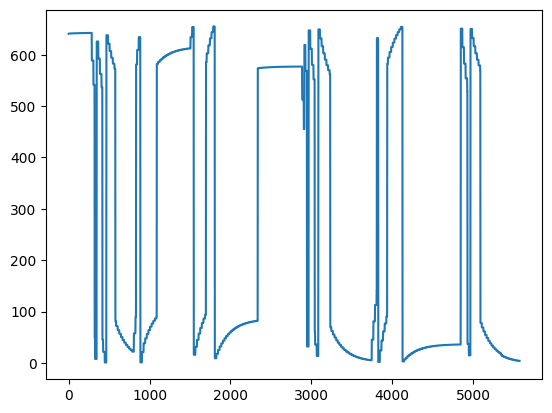

In [83]:
df["vbat (V)"].plot()

<Axes: >

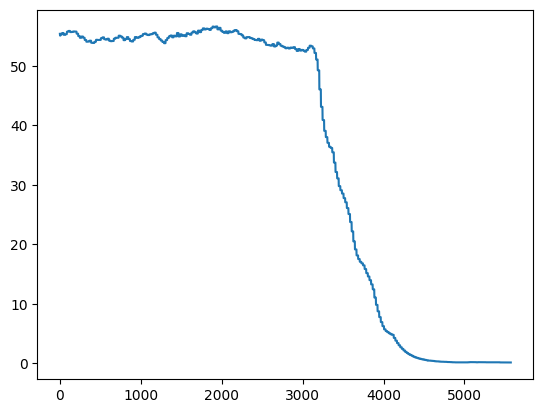

In [84]:
df["amperage (A)"].plot()

<Axes: >

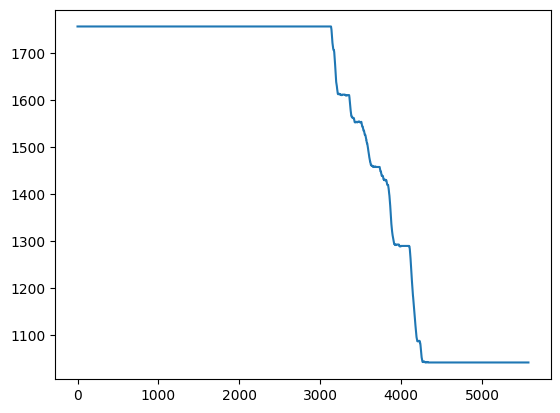

In [67]:
# the rest are constant
df["rcCommand[3]"].plot()

<Axes: >

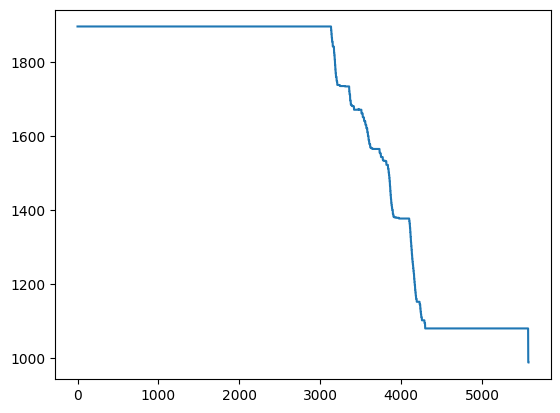

In [62]:
# the rest are constant
df["rcData[3]"].plot()

<Axes: >

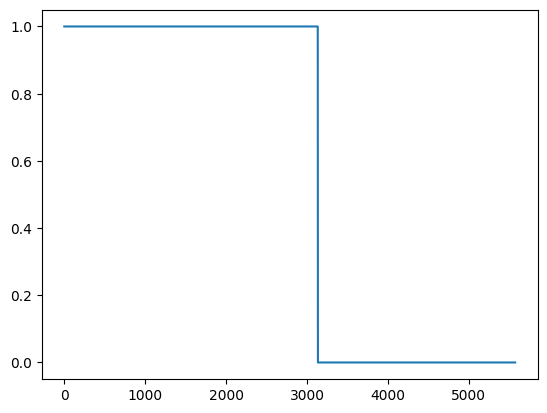

In [88]:
(df["rcData[3]"] == df["rcData[3]"].max()).apply(lambda x: 1 if x else 0).plot()

<Axes: >

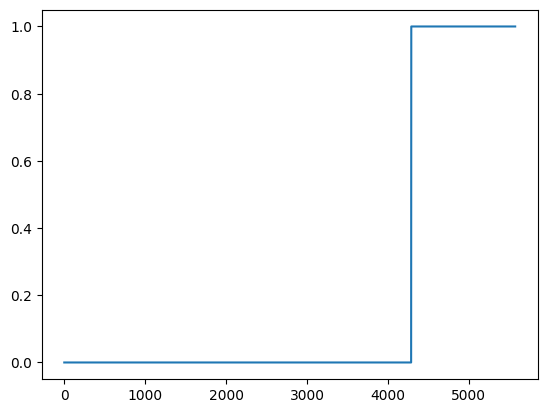

In [50]:
df["stateFlags (flags)"].apply(lambda x: 1 if "ANTI_WINDUP" in x else 0).plot()

<Axes: >

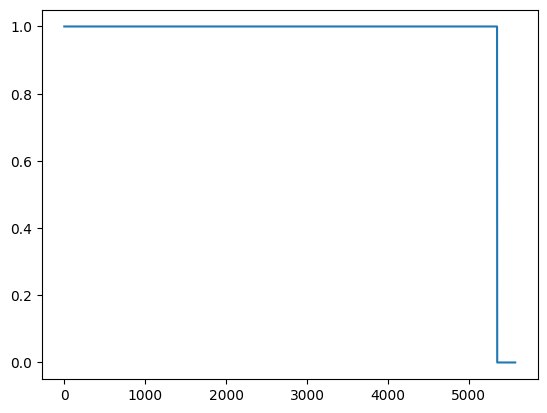

In [47]:
df["flightModeFlags (flags)"].apply(lambda x: 1 if x == "ARM|BLACKBOX" else 0).plot()

<Axes: >

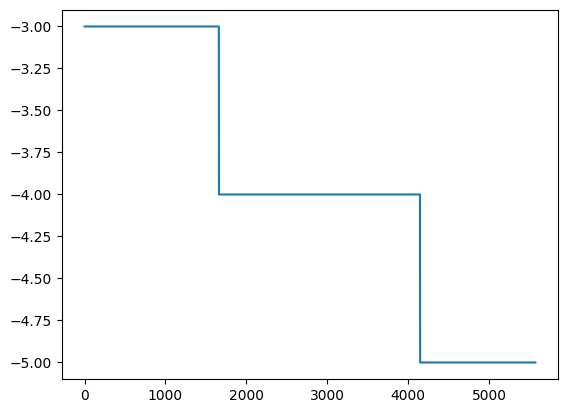

In [77]:
df["axisI[0]"].plot()

<Axes: >

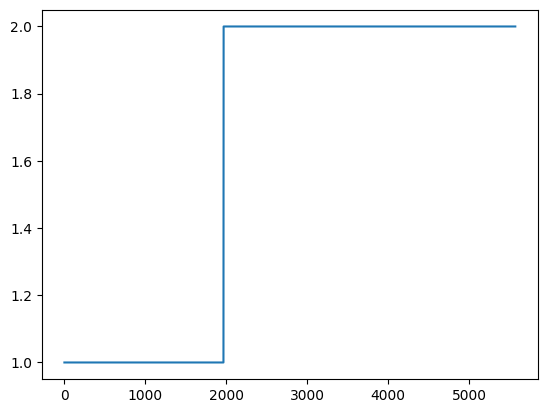

In [79]:
df["axisI[1]"].plot()